# Linear Regression ([Book](https://d2l.ai/chapter_linear-regression/linear-regression.html#linear-regression))

## Assumptions

- Target value y (better said its conditional mean $ E[Y | X = x]$ ) is a linear combination of features **x** of sample x
- Observation noise, which causes deviation of y from its expected value, follows a gaussian
- Notation: superscript for ith sample, subscript for ith feature of a sample

## Loss Function (or how to measure the performance of our model)

- It quantifies the distance between real and predicted values
- The loss function over the entire model, we call it L, is the average of losses over every single example
- Our goal is to find the minimum of L
- Detail: in case of linearity, L is a function of the weights $w$ and the bias $b$

## Gradient descent (or how to iteratively reducing the error)

The goal is to find the optimal $\hat w$ and $\hat b$ and the steps of the algorithm are
1. We select a batch of training examples of dimension $B$
2. We evaluate the gradient (over $w$ and $b$) of the loss of each example in the batch
3. We take the mean of all gradient evaluations
4. We update the parameters $w$ and $b$ in direction of the negative gradient with a step size $ \eta $


## Code example : Linear Regression On Synthetic Data

In [23]:
from mylib.datamodule import *
import torch

#Generate design matrix and labels with a priori defined weights and bias
num_weights = 15
w = torch.rand(num_weights)
print(f"Weights randomly chosen as equal to {w}")
data = SyntheticRegressionData(w, b = 1.4)
print('features:', data.X[0],'\nlabel:', data.y[0])

#Extract next minibatch
X, y = next(iter(data.train_dataloader()))
print('X shape:', X.shape, '\ny shape:', y.shape)
len(data.train_dataloader())

Weights randomly chosen as equal to tensor([0.7738, 0.1274, 0.4613, 0.8613, 0.2922, 0.1678, 0.1148, 0.7945, 0.6443,
        0.6595, 0.0954, 0.0137, 0.7556, 0.3562, 0.3183])
features: tensor([-0.6744, -0.7953,  1.3422, -0.6501,  0.4597,  1.5703, -1.5097, -0.2289,
         0.9257,  0.2614,  0.7017,  0.4690,  0.1658, -2.0748, -0.9007]) 
label: tensor([0.8179])
X shape: torch.Size([32, 15]) 
y shape: torch.Size([32, 1])


32

error in estimating w: tensor([-4.4465e-05,  1.7174e-04,  6.1047e-04,  1.3065e-04,  6.6531e-04,
        -4.6363e-04, -5.0556e-04, -2.2554e-04,  5.1731e-04, -5.6112e-04,
        -1.4901e-07,  1.8254e-04, -2.1470e-04,  8.4072e-05, -1.8030e-05])
error in estimating b: tensor([-0.0001])


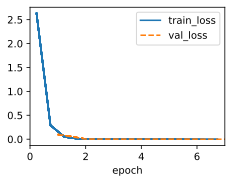

In [24]:
from mylib.module import LinearRegression
from mylib.trainer import Trainer
# Fit a function to the known parameters through linear regression
model = LinearRegression(lr=0.03)
trainer = Trainer(max_epochs = 7)
trainer.fit(model,data)

w, b = model.get_w_b()

print(f'error in estimating w: {data.w - w.reshape(data.w.shape)}')
print(f'error in estimating b: {data.b - b}')

error in estimating w: tensor([ 1.1202e-03,  1.1932e-03,  1.2564e-03,  2.6197e-03,  2.3122e-03,
        -1.0515e-03,  1.9742e-04,  5.7220e-04,  2.0346e-03,  3.6478e-05,
         7.1368e-04, -1.2060e-03,  1.5908e-03,  9.0986e-04,  3.3647e-04],
       grad_fn=<SubBackward0>)
error in estimating b: tensor([0.0011], grad_fn=<RsubBackward1>)


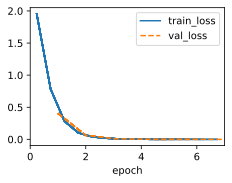

In [25]:
from mylib.module import LinearRegressionScratch
from mylib.trainer import Trainer
# Fit a function to the known parameters through linear regression
model = LinearRegressionScratch(num_weights, lr=0.03)
trainer = Trainer(max_epochs = 7)
trainer.fit(model,data)

print(f'error in estimating w: {data.w - model.w.reshape(data.w.shape)}')
print(f'error in estimating b: {data.b - model.b}')